In [25]:
import pandas as pd
import numpy as np

In [669]:
df = pd.read_json('playlists_dataframe_all_dummy.json')

In [670]:
df.shape

(1630, 40)

In [671]:
df.columns

Index(['acous_mean', 'acous_std', 'avaiable_market', 'dance_mean', 'dance_std',
       'energy_mean', 'energy_std', 'followers', 'genre_narrow_blues',
       'genre_narrow_children', 'genre_narrow_classical', 'genre_narrow_dance',
       'genre_narrow_drama', 'genre_narrow_electronic', 'genre_narrow_funk',
       'genre_narrow_hardcore', 'genre_narrow_healing', 'genre_narrow_hiphop',
       'genre_narrow_hollywood', 'genre_narrow_jazz', 'genre_narrow_metal',
       'genre_narrow_modern', 'genre_narrow_other', 'genre_narrow_pop',
       'genre_narrow_punk', 'genre_narrow_rap', 'genre_narrow_rock',
       'genre_narrow_soul', 'instru_mean', 'instru_std', 'live_mean',
       'live_std', 'loud_mean', 'loud_std', 'name', 'pop_mean', 'pop_std',
       'tracks_num', 'valence_mean', 'valence_std'],
      dtype='object')

In [673]:
y_train=np.floor(np.log10(df['followers']+1))
columns_keep=['genre_narrow_blues','genre_narrow_children', 'genre_narrow_classical', 'genre_narrow_dance','genre_narrow_electronic', 'genre_narrow_funk', 'genre_narrow_hardcore','genre_narrow_healing', 'genre_narrow_hiphop', 'genre_narrow_jazz','genre_narrow_metal', 'genre_narrow_modern', 'genre_narrow_other','genre_narrow_pop', 'genre_narrow_rap', 'genre_narrow_rock','genre_narrow_soul', 'instru_mean', 'instru_std', 'name', 'pop_mean', 'pop_std','tracks_num']
# x_train=df[columns_keep]
x_train=df.drop(['followers'],axis=1)

In [674]:
y_train.shape

(1630,)

In [675]:
x_train['name'].shape

(1630,)

In [676]:
bag_words={}
for name in x_train['name']:
    for word in name.split():
        if word in bag_words.keys():
            bag_words[word]+=1
        else:
            bag_words[word]=1

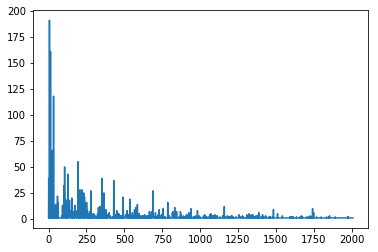

In [677]:
import matplotlib.pyplot as plt

plt.plot(range(len(list(bag_words.keys()))),list(bag_words.values()))
plt.show()

In [731]:
k=np.argsort(list(bag_words.values()))
common=['This','Is:','the','The','A','a','to','of','is:','&','in','In','and','Of','With','For','-','To','for']
vocabulary=[list(bag_words.keys())[i] for i in k if list(bag_words.keys())[i] not in common][-500:]


In [732]:
total_list_f=[]
for name in x_train['name']:
    voc={}
    for word in name.split():
        voc[word]=True
    list_feature=[1 if word in voc.keys() else 0 for word in vocabulary]
    total_list_f.append(list_feature)

In [733]:
total_list_f=np.vstack(total_list_f)
x_train_d=pd.DataFrame()
for j in range(total_list_f.shape[1]):
    x_train_d['bw_%d'%j]=total_list_f[:,j]

In [734]:
msk = np.random.rand(x_train.shape[0]) < 0.9


In [735]:
x_train_d.shape

(1630, 500)

In [743]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.metrics import accuracy_score

est2 = RandomForestClassifier(n_estimators=10000,max_features=0.01,max_depth=50)
est2.fit(x_train_d[msk], y_train[msk])

# print(rf2.score(x_train, y_train))
print(est2.score(x_train_d[~msk], y_train[~msk]))

0.440251572327


In [744]:
conf_mat = confusion_matrix(y_train[~msk], est2.predict(x_train_d[~msk]))
# conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
# conf_df
conf_mat

array([[ 0,  2,  0,  0,  4,  0,  0],
       [ 0,  5,  0,  0,  4,  1,  0],
       [ 0,  0,  5,  1, 13,  2,  0],
       [ 0,  0,  0,  0, 16,  5,  0],
       [ 0,  0,  0,  1, 44,  8,  0],
       [ 0,  0,  2,  2, 20, 16,  0],
       [ 0,  0,  0,  0,  7,  1,  0]])

In [745]:
x_train_m=x_train.drop(['name'],axis=1,inplace=False)

In [760]:
from sklearn.linear_model import LogisticRegressionCV
logregmul = LogisticRegressionCV(fit_intercept=True,cv=5,penalty='l2')
logregmul.fit(x_train_m[msk], y_train[msk])


/Users/zhaiyi/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [761]:
print(logregmul.score(x_train_m[msk], y_train[msk]))

0.423521414004


In [762]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train[~msk], logregmul.predict(x_train_m[~msk]))
# conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=0', 'y_hat = 1'], index = ['y=0', 'y=1'])
# conf_df
conf_mat

array([[ 0,  0,  1,  0,  3,  2,  0],
       [ 0,  0,  7,  0,  2,  1,  0],
       [ 0,  0, 10,  0, 10,  1,  0],
       [ 0,  0,  5,  0, 11,  5,  0],
       [ 0,  0,  5,  0, 37, 11,  0],
       [ 0,  0,  1,  0,  6, 33,  0],
       [ 0,  0,  0,  0,  0,  8,  0]])

In [763]:
models=[]

In [764]:
models.append(logregmul)
models.append(est2)


In [765]:
meta_x=np.transpose(np.vstack([models[0].predict(x_train_m[msk]), models[1].predict(x_train_d[msk])]))
meta_xx=np.transpose(np.vstack([models[0].predict(x_train_m[~msk]), models[1].predict(x_train_d[~msk])]))

In [766]:

meta_y=y_train[msk]
lr=LogisticRegressionCV(cv=3)
lr.fit(meta_x,meta_y)
lr.score(meta_xx,y_train[~msk])

/Users/zhaiyi/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.46540880503144655

In [655]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers.core import Flatten, Dropout, Dense
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.optimizers import Adam

In [777]:
model = Sequential()
layers=[Dense(units=2000, activation="relu"),Dense(units=2000, activation="relu"),Dense(8,activation="softmax")]
model.add(Dropout(0.5, input_shape=(538,)))
model.add(layers[0])
for layer in range(1):
    model.add(Dropout(0.5))
    model.add(layers[1])
model.add(Dropout(0.5))    
model.add(layers[2])
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=["accuracy"])

In [778]:
x_new=np.hstack([x_train_m[msk],x_train_d[msk]])


In [779]:
y_dummies=pd.get_dummies(y_train)
y_dummies.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0
10,0,0,0,0,0,1,0,0
100,0,0,0,0,1,0,0,0
1000,0,0,0,0,1,0,0,0


In [780]:

y=y_dummies[msk]

In [ ]:
model.fit(np.array(x_new),np.array(y),epochs=700,verbose=1)

Epoch 1/700
1471/1471 [==============================] - 2s - loss: 1.3491 - acc: 0.4568     
Epoch 2/700
1471/1471 [==============================] - 2s - loss: 1.3756 - acc: 0.4500     
Epoch 3/700
1471/1471 [==============================] - 2s - loss: 1.3613 - acc: 0.4439     
Epoch 4/700
1471/1471 [==============================] - 2s - loss: 1.3633 - acc: 0.4371     
Epoch 5/700
1471/1471 [==============================] - 2s - loss: 1.3361 - acc: 0.4575     
Epoch 6/700
1471/1471 [==============================] - 2s - loss: 1.3708 - acc: 0.4480     
Epoch 7/700
1471/1471 [==============================] - 2s - loss: 1.3468 - acc: 0.4691     
Epoch 8/700
1471/1471 [==============================] - 2s - loss: 1.3397 - acc: 0.4670     
Epoch 9/700
1471/1471 [==============================] - 2s - loss: 1.3365 - acc: 0.4725     
Epoch 10/700
1471/1471 [==============================] - 2s - loss: 1.3809 - acc: 0.4697     
Epoch 11/700
1471/1471 [==============================] - 2

1471/1471 [==============================] - 2s - loss: 1.3142 - acc: 0.4752     
Epoch 88/700
1471/1471 [==============================] - 2s - loss: 1.3654 - acc: 0.4562     
Epoch 89/700
1471/1471 [==============================] - 2s - loss: 1.3364 - acc: 0.4731     
Epoch 90/700
1471/1471 [==============================] - 2s - loss: 1.3548 - acc: 0.4568     
Epoch 91/700
1471/1471 [==============================] - 2s - loss: 1.3434 - acc: 0.4670     
Epoch 92/700
1471/1471 [==============================] - 2s - loss: 1.3870 - acc: 0.4555     
Epoch 93/700
1471/1471 [==============================] - 2s - loss: 1.3529 - acc: 0.4541     
Epoch 94/700
1471/1471 [==============================] - 2s - loss: 1.3413 - acc: 0.4670     
Epoch 95/700
1471/1471 [==============================] - 2s - loss: 1.3607 - acc: 0.4630     
Epoch 96/700
1471/1471 [==============================] - 2s - loss: 1.3443 - acc: 0.4697     
Epoch 97/700
1471/1471 [==============================] - 2s - 

1471/1471 [==============================] - 2s - loss: 1.3321 - acc: 0.4847     
Epoch 173/700
1471/1471 [==============================] - 2s - loss: 1.3510 - acc: 0.4562     
Epoch 174/700
1471/1471 [==============================] - 2s - loss: 1.3422 - acc: 0.4575     
Epoch 175/700
1471/1471 [==============================] - 2s - loss: 1.3046 - acc: 0.4820     
Epoch 176/700
1471/1471 [==============================] - 2s - loss: 1.3121 - acc: 0.4650     
Epoch 177/700
1471/1471 [==============================] - 2s - loss: 1.3291 - acc: 0.4616     
Epoch 178/700
1471/1471 [==============================] - 2s - loss: 1.3024 - acc: 0.4908     
Epoch 179/700
1471/1471 [==============================] - 2s - loss: 1.3292 - acc: 0.4623     
Epoch 180/700
1471/1471 [==============================] - 2s - loss: 1.3268 - acc: 0.4895     
Epoch 181/700
1471/1471 [==============================] - 2s - loss: 1.2980 - acc: 0.4793     
Epoch 182/700
1471/1471 [=============================

1471/1471 [==============================] - 2s - loss: 1.2868 - acc: 0.5099     
Epoch 258/700
1471/1471 [==============================] - 2s - loss: 1.2979 - acc: 0.4827     
Epoch 259/700
1471/1471 [==============================] - 2s - loss: 1.3198 - acc: 0.4697     
Epoch 260/700
1471/1471 [==============================] - 2s - loss: 1.2852 - acc: 0.4806     
Epoch 261/700
1471/1471 [==============================] - 2s - loss: 1.3061 - acc: 0.4854     
Epoch 262/700
1471/1471 [==============================] - 2s - loss: 1.2899 - acc: 0.4840     
Epoch 263/700
1471/1471 [==============================] - 2s - loss: 1.3213 - acc: 0.4901     
Epoch 264/700
1471/1471 [==============================] - 2s - loss: 1.3028 - acc: 0.4541     
Epoch 265/700
1471/1471 [==============================] - 2s - loss: 1.3001 - acc: 0.4806     
Epoch 266/700
1471/1471 [==============================] - 2s - loss: 1.3274 - acc: 0.4691     
Epoch 267/700
1471/1471 [=============================

1471/1471 [==============================] - 2s - loss: 1.3192 - acc: 0.4704     
Epoch 343/700
1471/1471 [==============================] - 2s - loss: 1.2919 - acc: 0.4963     
Epoch 344/700
1471/1471 [==============================] - 2s - loss: 1.2792 - acc: 0.4997     
Epoch 345/700
1471/1471 [==============================] - 3s - loss: 1.2891 - acc: 0.4820     
Epoch 346/700
1471/1471 [==============================] - 2s - loss: 1.2628 - acc: 0.5031     - ETA: 0s - loss: 1.2520 -
Epoch 347/700
1471/1471 [==============================] - 2s - loss: 1.3146 - acc: 0.4908     
Epoch 348/700
1471/1471 [==============================] - 3s - loss: 1.3270 - acc: 0.4793     
Epoch 349/700
1471/1471 [==============================] - 2s - loss: 1.2938 - acc: 0.5010     
Epoch 350/700
1471/1471 [==============================] - 3s - loss: 1.3373 - acc: 0.4752     
Epoch 351/700
1471/1471 [==============================] - 2s - loss: 1.3170 - acc: 0.4765     
Epoch 352/700
1471/1471 [===

1471/1471 [==============================] - 2s - loss: 1.2804 - acc: 0.4806     - ETA: 1s - loss: 1.3494 - acc: 0.43 - ETA: 
Epoch 427/700
1471/1471 [==============================] - 2s - loss: 1.3137 - acc: 0.4799     
Epoch 428/700
1471/1471 [==============================] - 2s - loss: 1.3179 - acc: 0.4888     
Epoch 429/700
1471/1471 [==============================] - 2s - loss: 1.2959 - acc: 0.4881     
Epoch 430/700
1471/1471 [==============================] - 2s - loss: 1.3089 - acc: 0.4793     
Epoch 431/700
1471/1471 [==============================] - 2s - loss: 1.3053 - acc: 0.4881     
Epoch 432/700
1471/1471 [==============================] - 2s - loss: 1.2785 - acc: 0.4881     
Epoch 433/700
1471/1471 [==============================] - 2s - loss: 1.2629 - acc: 0.4942     
Epoch 434/700
1471/1471 [==============================] - 2s - loss: 1.2879 - acc: 0.4840     
Epoch 435/700
1471/1471 [==============================] - 2s - loss: 1.3167 - acc: 0.4915     
Epoch 436/

1471/1471 [==============================] - 2s - loss: 1.2963 - acc: 0.4881     
Epoch 512/700
1471/1471 [==============================] - 2s - loss: 1.2934 - acc: 0.4901     
Epoch 513/700
1471/1471 [==============================] - 2s - loss: 1.3081 - acc: 0.4752     
Epoch 514/700
1471/1471 [==============================] - 2s - loss: 1.2820 - acc: 0.4725     
Epoch 515/700
1471/1471 [==============================] - 2s - loss: 1.3085 - acc: 0.4833     
Epoch 516/700
1471/1471 [==============================] - 2s - loss: 1.3100 - acc: 0.4684     
Epoch 517/700
1471/1471 [==============================] - 2s - loss: 1.3135 - acc: 0.4636     
Epoch 518/700
1471/1471 [==============================] - 2s - loss: 1.2808 - acc: 0.4874     
Epoch 519/700
1471/1471 [==============================] - 2s - loss: 1.3196 - acc: 0.4650     
Epoch 520/700
1471/1471 [==============================] - 2s - loss: 1.2971 - acc: 0.4752     
Epoch 521/700
1471/1471 [=============================

1471/1471 [==============================] - 3s - loss: 1.2925 - acc: 0.4820     
Epoch 597/700
1471/1471 [==============================] - 2s - loss: 1.3128 - acc: 0.4609     
Epoch 598/700
1471/1471 [==============================] - 2s - loss: 1.2872 - acc: 0.4793     
Epoch 599/700
1471/1471 [==============================] - 2s - loss: 1.2782 - acc: 0.4874     
Epoch 600/700
1471/1471 [==============================] - 2s - loss: 1.2814 - acc: 0.4854     
Epoch 601/700
1471/1471 [==============================] - 2s - loss: 1.2503 - acc: 0.4956     
Epoch 602/700
1471/1471 [==============================] - 2s - loss: 1.2789 - acc: 0.4949     -
Epoch 603/700
1471/1471 [==============================] - 2s - loss: 1.2497 - acc: 0.4867     
Epoch 604/700
1471/1471 [==============================] - 2s - loss: 1.2968 - acc: 0.4881     
Epoch 605/700
1471/1471 [==============================] - 2s - loss: 1.2907 - acc: 0.4990     
Epoch 606/700
1471/1471 [============================

In [782]:
accuracy_score(np.argmax(model.predict(np.hstack([x_train_m[~msk],x_train_d[~msk]])),axis=1),np.argmax(np.array(y_dummies[~msk]),axis=1))

0.37106918238993708

In [588]:
pd.concat([x_train_m[msk],x_train_d[msk]],axis=1)

,genre_narrow_blues,genre_narrow_children,genre_narrow_classical,genre_narrow_dance,genre_narrow_electronic,genre_narrow_funk,genre_narrow_hardcore,genre_narrow_healing,genre_narrow_hiphop,genre_narrow_jazz,...,bw_190,bw_191,bw_192,bw_193,bw_194,bw_195,bw_196,bw_197,bw_198,bw_199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
